In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

R² Score: 0.576
MSE: 0.556

Feature Coefficients:
  AveBedrms: 0.7831 (Positive relationship)
  MedInc: 0.4487 (Positive relationship)
  HouseAge: 0.0097 (Positive relationship)
  Population: -0.0000 (Negative relationship)
  AveOccup: -0.0035 (Negative relationship)
  AveRooms: -0.1233 (Negative relationship)
  Latitude: -0.4198 (Negative relationship)
  Longitude: -0.4337 (Negative relationship)


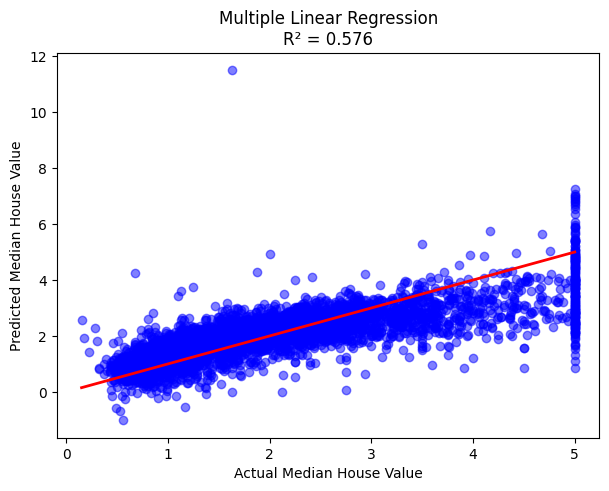

In [2]:


# Load dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}\n")

# Coefficients with feature names
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("Feature Coefficients:")
for feature, coef in zip(coef_df["Feature"], coef_df["Coefficient"]):
    relation = "Positive" if coef > 0 else "Negative"
    print(f"  {feature}: {coef:.4f} ({relation} relationship)")

# Visualization: Predicted vs Actual
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title(f"Multiple Linear Regression\nR² = {r2:.3f}")
plt.show()